# SimBench Grid Usage Examples including Study Cases and Time Series Analysis

This tutorial shows how SimBench grids can be received and used.

First, this tutorial introduces the SimBench code which is required to receive SimBench grids.

Second, the received SimBench grids are exemplary used to:
* run a simple power flow
* run and analyze predefined study cases
* run a timeseries calculation using the predefined profiles

In [1]:
# Let's do some necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import pandapower as pp
import pandapower.topology as top
import pandapower.plotting as plot
import simbench as sb

SimBench provides a benchmark dataset which contains
* 1 extra-high voltage (EHV) grid
* 2 high voltage (HV) grids
* 4 medium voltage (MV) grids
* 6 low voltage (LV) grids
* 27 end-consumer load profiles in p and q (LV, MV)
* 27 generation profiles of renewables (LV-EHV)
* 320 generation profiles of power plants (EHV)
* 48 storage profiles (LV-EHV)
* grid equivalent profiles for all LV-HV grids for loads, renewables and storages
* 3 scenarios of each grid

SimBench grids are appropriate to be used for various use cases also including use cases considering multiple voltage levels. As a result, all SimBench grids can be interconnected. To reduce the number of possible combinations, the most relevant combinations are selected and available as simbench code. **The SimBench code names distinctively a grid which is a useful excerpt of the full SimBench grid dataset**. Thus, the SimBench grid usage achieves improved comprehensibility and simplified reproducibility.

## SimBench Code

The SimBench code is a string which looks like "1-HVMV-urban-2.202-0-no_sw". It uses "-" as separator. 

The SimBench Code makes use of the subnet parameter which you can find in the dataset.
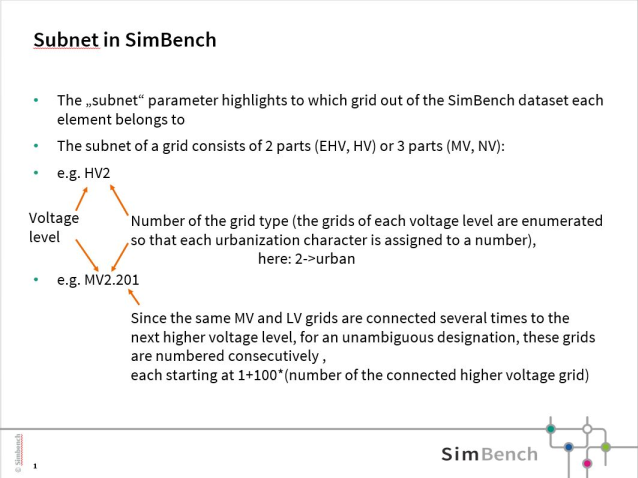

While the subnet describes to which grid an element belongs to, the SimBench code describes the full grid data excerpt of the SimBench dataset. The grids distinctively named by a SimBench code can include several subnets and the code gives information about the chosen scenario and switch consideration level.
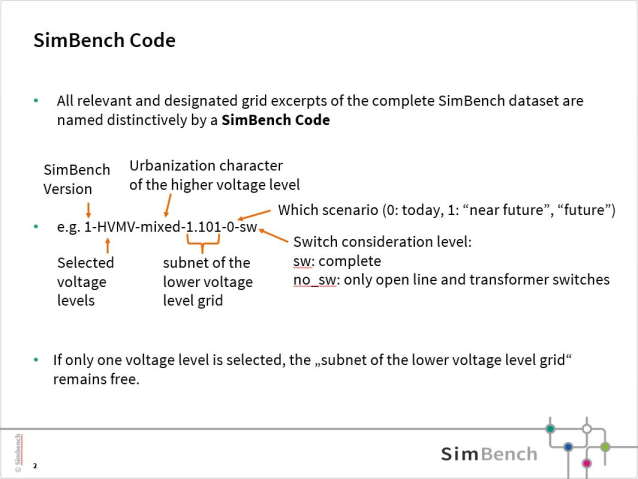

To quickly start with SimBench grids, here you can find the SimBench codes of the basic grids (without any second voltage level) of scenario 0 and with full switch consideration level:

| (Exemplary) Subnet | SimBench code       | Urbanzation character | Rated voltage [kV] | No. supply points | Transformer types          | Generation types          | Geo. Information with relation to reality |
|------------|---------------------|-----------------------|--------------------|-------------------|----------------------------|---------------------------|-------------------------------------------|
|    EHV1    | 1-EHV-mixed--0-sw   |    mixed              |    380,   220      |      390      |    209x600MVA              |    Nuclear, coal, gas     | yes                                       |
|    HV1     | 1-HV-mixed--0-sw    |    mixed              |    110             |       58       |    2x300MVA,   4x350MVA    | Wind                      | yes                                       |
|    HV2     | 1-HV-urban--0-sw    |    urban              |    110             |    79       |    3x300MVA                | Wind                     | yes                                       |
|    MV1.101     | 1-MV-rural--0-sw    |    rural              |    20              |    92      |    2x25MVA                 | Wind, PV, Biomass, Hydro   |  no                                       |
|    MV2.101     | 1-MV-semiurb--0-sw  |    semi-urban         |    20              |    112      |    2x40MVA                 | Wind, PV, Biomass, Hydro   | no                                        |
|    MV3.101     | 1-MV-urban--0-sw    |    urban              |    10              |    134      |    2x63MVA                 | Wind, PV, Hydro           | no                                        |
|    MV4.101     | 1-MV-comm--0-sw     |    commercial         |    20              |    98      |    2x40MVA                 | Wind, PV, Biomass, Hydro   | no                                        |
|    LV1.101     | 1-LV-rural1--0-sw   |    rural              |    0.4             |    13       |    1x160kVA                | PV                        | no                                        |
|    LV2.101     | 1-LV-rural2--0-sw   |    rural              |    0.4             |    93      |    1x250kVA                | PV                        | no                                        |
|    LV3.101     | 1-LV-rural3--0-sw   |    rural              |    0.4             |    118      |    1x400kVA                | PV                        | no                                        |
|    LV4.101     | 1-LV-semiurb4--0-sw |    semi-urban         |    0.4             |    39       |    1x400kVA                |  PV                       | no                                        |
|    LV5.201     | 1-LV-semiurb5--0-sw |    semi-urban         |    0.4             |    104      |    1x630kVA                | PV                        | no                                        |
|    LV6.201     | 1-LV-urban6--0-sw   |    urban              |    0.4             |    53       |    1x630kVA                | PV                        | no                                        |

To get an overall picture of provided SimBench codes, you can have a full look into the list of all SimBench codes via collect_all_simbench_codes(). You also can restrict the list, giving some parameters to the function.

In [2]:
# get lists of simbench codes
all_simbench_codes = sb.collect_all_simbench_codes()
all_simbench_code_with_LV_as_lower_voltage_level = sb.collect_all_simbench_codes(lv_level="LV")

Please, notice that the SimBench code was designed with the expectation that the user usually wants to use *only one or two voltage levels at the same time*. In the case that you need more than two voltage levels, you may receive the complete data of SimBench (which is more than a compatible grid -> for more detail, please have a look to the SimBench documentation section 4.2 available at the SimBench website (https://simbench.de/en/download/)) or the complete SimBench grid (here all external grid representations are excluded which are included as detailled grid data -> the complete SimBench grid should be executable in principle within power flow analysis tools) via the following codes:

In [3]:
complete_data_sb_codes = ["1-complete_data-mixed-all-%i-sw" % scenario for scenario in [0, 1, 2]]
complete_grid_sb_codes = ["1-EHVHVMVLV-mixed-all-%i-sw" % scenario for scenario in [0, 1, 2]]

## Receiving a SimBench Grid

You can get a SimBench grid by passing a valid SimBench code to the function get_simbench_net().

In [4]:
sb_code1 = "1-MV-rural--0-sw"  # rural MV grid of scenario 0 with full switchs
net = sb.get_simbench_net(sb_code1)

sb_code2 = "1-HVMV-urban-all-0-no_sw"  # urban hv grid with one connected mv grid which has the subnet 2.202
multi_voltage_grid = sb.get_simbench_net(sb_code2)

## Simple Power Flow

Let's have a look to a simple MV grid for simple power flow analysis.

In [5]:
net

This pandapower network includes the following parameter tables:
   - bus (97 elements)
   - load (96 elements)
   - sgen (102 elements)
   - switch (204 elements)
   - ext_grid (1 element)
   - line (99 elements)
   - trafo (2 elements)
   - measurement (37 elements)
   - substation (1 element)
   - loadcases (6 elements)

All SimBench grids are designed to be realistic. For example, the number of supplying nodes is about 100. In the rural MV grid, these consumers are supplied by open rings systems.

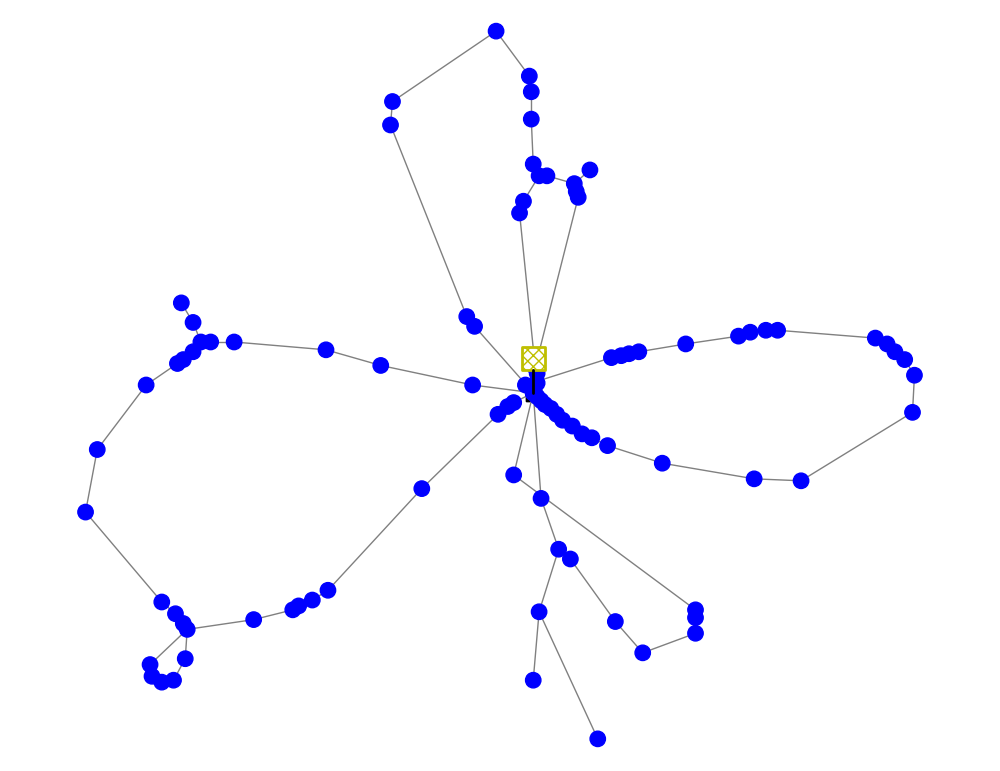

<Axes: >

In [47]:
# plot the grid to show the open ring systems
plot.simple_plot(net)

In initial state, all powers are set to maximum values. It is unrealistic that all maximum values of all loads and various generation types occur at the same time. But usually this is no problem to the distribution grids (LV, MV, HV) of SimBench, since the superposition of generation and load is less challenging to supply than grid states where almost only generation or almost only load occur.

In [ ]:
# let's run a simple power flow calculation while assuming an outage of the first line in feeder 1
outage_line = 1
outage_line_switches = net.switch.index[(net.switch.element == outage_line) & (net.switch.et == "l")]
net.switch.loc[outage_line_switches, "closed"] = False

# resupply feeder 1 via feeder 5
feeder1_buses = net.bus.index[net.bus.subnet.str.contains("Feeder1")]
feeder5_buses = net.bus.index[net.bus.subnet.str.contains("Feeder5")]
loop_line_1_5 = net.line.index[net.line.from_bus.isin(feeder1_buses) & net.line.to_bus.isin(feeder5_buses)]
loop_switches_1_5 = net.switch.index[(net.switch.element == loop_line_1_5[0]) & (net.switch.et == "l")]
net.switch.loc[loop_switches_1_5, "closed"] = True

# run a simple power flow
pp.runpp(net)

# analyze maximal loaded lines
feeder_1_5_lines = net.line.subnet.str.contains("Feeder1") | net.line.subnet.str.contains("Feeder5")
net.res_line.loading_percent.loc[feeder_1_5_lines].max()  # maximal loaded line of Feeder 1 and 5
# -> maximal line loading is less than 100%


68.13953789902867

In [49]:
# print number of unsupplied buses
unsupplied_buses = top.unsupplied_buses(net)
len(unsupplied_buses)

0

## Run and Analyze Predefined Study Cases

SimBench provides predefined study cases which can be used for grid planning. The study cases are presented and specified in the paper 
Meinecke, Klettke, Sarajlic, Dickert, Hable et. al. "General Planning and Operational Principles in German Distribution Systems Used for SimBench", CIRED 2019, 25th International Conference on Electricity Distribution. 
A summary is also given in the SimBench documentation.
The study cases define scaling factors for load active and reactive power as well as generation active power.

In [50]:
# the predefined study case data are stored in pandapower within net.loadcases
net.loadcases

,pload,qload,Wind_p,PV_p,RES_p,Slack_vm
Study Case,,,,,,
hL,1.0,1.000000,0.00,0.00,0.0,1.035
n1,1.0,1.000000,0.00,0.00,0.0,1.035
hW,1.0,1.000000,1.00,0.80,1.0,1.035
hPV,1.0,1.000000,0.85,0.95,1.0,1.035
lW,0.1,0.122543,1.00,0.80,1.0,1.015
lPV,0.1,0.122543,0.85,0.95,1.0,1.015


Now we want to apply the study cases.

Since the scaling factors in net.loadcases are relative and refer to the maximum values given in `net[element][max_val_column]` with element is `load`, `sgen` or `ext_grid` and max_val_column is `p_mw`, `q_mvar` or `vm_pu`, first, we need to calculate the absolute values. Afterwards we write the absolute values into `net[element][parameter]` and run a power flow.

In [51]:
# calculate the absolute values:
loadcases = sb.get_absolute_values(net, profiles_instead_of_study_cases=False)

# define a function to apply absolute values
def apply_absolute_values(net, absolute_values_dict, case_or_time_step):
    for elm_param in absolute_values_dict.keys():
        if absolute_values_dict[elm_param].shape[1]:
            elm = elm_param[0]
            param = elm_param[1]
            net[elm].loc[:, param] = absolute_values_dict[elm_param].loc[case_or_time_step]

# let's analyze the (n-1)-case
apply_absolute_values(net, loadcases, "n1")

# adapt trafo tap position
net.trafo["tap_pos"] = -1

# run a power flow and log basic results
pp.runpp(net)
pp.lf_info(net)

print(net.res_sgen.p_mw.sum())
print(net.res_load.p_mw.sum())

hp.pandapower.toolbox.result_info - INFO: Max voltage in vm_pu:
hp.pandapower.toolbox.result_info - INFO:   1.0366719617122484 at busidx 2 (MV1.101 busbar1.1)
hp.pandapower.toolbox.result_info - INFO: Min voltage in vm_pu:
hp.pandapower.toolbox.result_info - INFO:   0.9520172165178736 at busidx 15 (MV1.101 Bus 15)
hp.pandapower.toolbox.result_info - INFO: Max loading trafo in %:
hp.pandapower.toolbox.result_info - INFO:   36.2246088399241 loading at trafo 0 (HV1-MV1.101-Trafo1)
hp.pandapower.toolbox.result_info - INFO:   36.2246088399241 loading at trafo 1 (HV1-MV1.101-Trafo2)
hp.pandapower.toolbox.result_info - INFO: Max loading line in %:
hp.pandapower.toolbox.result_info - INFO:   53.858594171083354 loading at line 44 (MV1.101 Line 45)
hp.pandapower.toolbox.result_info - INFO:   53.221190845578306 loading at line 45 (MV1.101 Line 46)


0.0
17.256


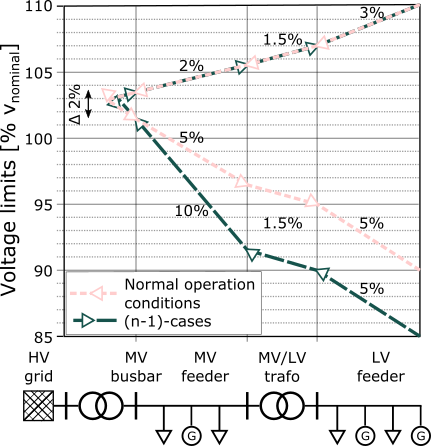

These exemplary power flow results show, SimBench grids in scenario 0 always hold above figured limits of the predefined study cases. The assumed voltage limits are 0.915 and 1.055 pu in (n-1)-case.

In contrast, the grids of scenarios 1 and 2 do not hold all limits since these represents future grids without grid expansion.

In [58]:
# let's have a look at the low load high generation (extra high wind) case
apply_absolute_values(net, loadcases, "lW")

# adapt trafo tap position
net.trafo["tap_pos"] = 2

# run a power flow and log basic results
pp.runpp(net)
pp.lf_info(net)
assert net.res_bus.vm_pu.loc[net.bus.index.difference(feeder1_buses.union(feeder5_buses))].max() < 1.055
assert net.res_bus.vm_pu.loc[net.bus.index.difference(feeder1_buses.union(feeder5_buses))].min() > 0.915

hp.pandapower.toolbox.result_info - INFO: Max voltage in vm_pu:
hp.pandapower.toolbox.result_info - INFO:   1.1825673728689035 at busidx 15 (MV1.101 Bus 15)
hp.pandapower.toolbox.result_info - INFO: Min voltage in vm_pu:
hp.pandapower.toolbox.result_info - INFO:   0.9872012257896651 at busidx 2 (MV1.101 busbar1.1)
hp.pandapower.toolbox.result_info - INFO: Max loading trafo in %:
hp.pandapower.toolbox.result_info - INFO:   45.78060595121995 loading at trafo 0 (HV1-MV1.101-Trafo1)
hp.pandapower.toolbox.result_info - INFO:   45.78060595121995 loading at trafo 1 (HV1-MV1.101-Trafo2)
hp.pandapower.toolbox.result_info - INFO: Max loading line in %:
hp.pandapower.toolbox.result_info - INFO:   101.51874070183955 loading at line 36 (MV1.101 Line 37)
hp.pandapower.toolbox.result_info - INFO:   98.98903846301906 loading at line 37 (MV1.101 Line 38)


The latest power flow results show, that the voltages of the resupplied feeder 1 and resupplying feeder 5 violates the maximum limit of the voltage magnitudes. This is because SimBench grids do not supply generation units with (n-1)-security.
However, all feeders in normal operation hold the limits.

## Run a Time Series Calculation using the Predefined Profiles

SimBench profiles are provided within net.profiles. In the element tables, the "profile" column specifies which profile is 
to be used for each element.

In [70]:
# load 'net' again to have no outage again
net = sb.get_simbench_net(sb_code1)

# As an example, the first sgen uses the profile:
net.sgen.profile.iloc[0]

'WP4'

Since there are load profiles for "p_mw" and "q_mvar", the load profile names in net.profile["load"] are extended by the
suffixes "_pload" and "_qload".
To check whether all applied respectively required are available in net.profiles, use the function profiles_are_missing().

In [71]:
# check that all needed profiles existent
assert not sb.profiles_are_missing(net)

Just as the loadcase scaling factors, the given profiles are relative and refer to the maximum values given in net[element][max_val_column]. The absolute values again can be easily calculated via get_absolute_profiles_from_relative_profiles() and applied via apply_absolute_values().

Plenty parameters of a net can be observed. Here, let's have a look to 
- the minimum and maximum voltages in the grid and
- the sum of all active powers of loads to compare the course with the load profiles.

In [72]:
# calculate absolute profiles
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

# let's calculate the first day of the year (take every fourth time step of the first 96 quarter hour time steps).
time_steps = range(96)

# set trafo tap position so that no voltage limits are violated
net.trafo.tap_pos = 1

# run the time series and store results into a DataFrame
results = pd.DataFrame([], index=time_steps, columns=["Load Sum", "min_vm_pu", "max_vm_pu"])
for time_step in time_steps:
    apply_absolute_values(net, profiles, time_step)
    pp.runpp(net)
    results.loc[time_step, "Load Sum"] = net.res_load.p_mw.sum()
    results.loc[time_step, "min_vm_pu"] = net.res_bus.vm_pu.min()
    results.loc[time_step, "max_vm_pu"] = net.res_bus.vm_pu.max()

If everything worked fine, now we can have a look to the course of the minimum and maximum voltages during the first day of the given profiles.

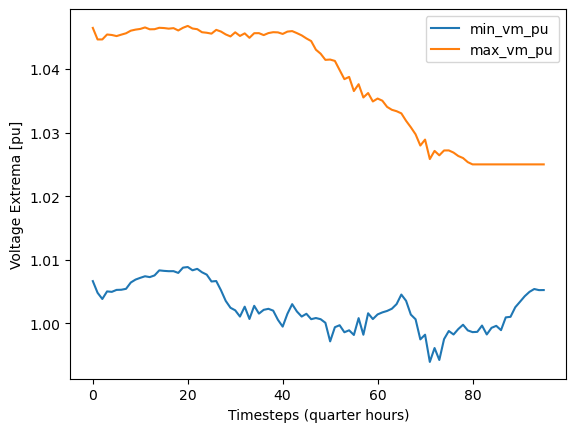

In [73]:
# plot the voltage extrema
#plt.rc('text', usetex=True)
fig1, ax1 = plt.subplots()
results[["min_vm_pu", "max_vm_pu"]].plot(ax=ax1)
ax1.set_ylabel("Voltage Extrema [pu]")
ax1.set_xlabel("Timesteps (quarter hours)")
plt.show()

Furthermore, let's compare the calulated active power sum of loads with the considered low voltage grid profiles

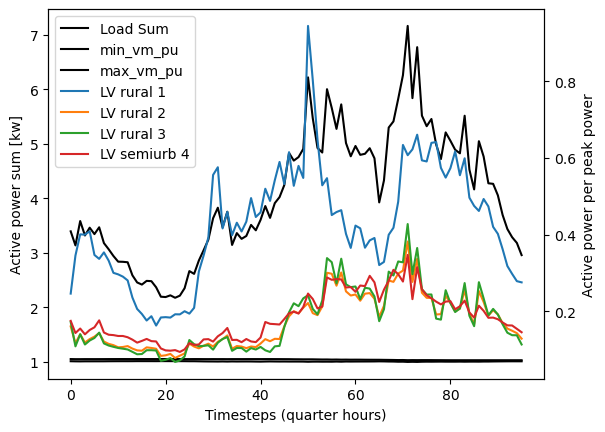

In [74]:
# get LV grid profiles DataFrame
load_profile_names = pd.Series(net.profiles["load"].columns)
lv_grid_profile_names = list(load_profile_names.loc[load_profile_names.str.contains("lv_") & load_profile_names.str.contains("pload")])
lv_grid_profiles = net.profiles["load"].loc[time_steps, lv_grid_profile_names]
lv_grid_profiles.columns = ["LV rural %i" % i for i in range(1, 4)] + ["LV semiurb 4"]

# plot load sum result and LV grid profiles
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
results.plot(ax=ax1, color='k')
lv_grid_profiles.plot(ax=ax2, legend=False)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.set_ylabel("Active power sum [kw]")
ax2.set_ylabel("Active power per peak power")
ax1.set_xlabel("Timesteps (quarter hours)")
plt.show()

One can imagine, that an appropriate combination of the load profiles could result in the calculated active power sum of loads.

### Using pandapower timeseries module

Since version 2.2.0, pandapower comes with a timeseries module. To be in line with that and for computational time reasons, we recommend you to use it instead of the simple, here defined function apply_absolute_values().

In [75]:
import tempfile
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries

# apply ConstControllers
sb.apply_const_controllers(net, profiles)
# create output writer
output_dir = os.path.join(tempfile.gettempdir(), "simbench_time_series_example")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
ow = OutputWriter(net, time_steps, output_path=output_dir, output_file_type=".json")
ow.log_variable('res_load', 'p_mw', eval_function=np.sum, eval_name="Load Sum")
ow.log_variable('res_bus', 'vm_pu', eval_function=np.min, eval_name="min_vm_pu")
ow.log_variable('res_bus', 'vm_pu', eval_function=np.max, eval_name="max_vm_pu")

# run timeseries
run_timeseries(net, time_steps)

# read result files and create same result DataFrame as above
vm_pu_file = os.path.join(output_dir, "res_bus", "vm_pu.json")
vm_pu = pd.read_json(vm_pu_file)
load_p_file = os.path.join(output_dir, "res_load", "p_mw.json")
load_p = pd.read_json(load_p_file)
result2 = pd.concat([load_p[["Load Sum"]], vm_pu[["min_vm_pu", "max_vm_pu"]]], axis=1)
result2.sort_index(inplace=True)

100%|██████████| 96/96 [00:01<00:00, 79.05it/s]
C:\Users\smeinecke\AppData\Local\Temp\ipykernel_3568\1331126851.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  vm_pu = pd.read_json(vm_pu_file)
C:\Users\smeinecke\AppData\Local\Temp\ipykernel_3568\1331126851.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  vm_pu = pd.read_json(vm_pu_file)
C:\Users\smeinecke\AppData\Local\Temp\ipykernel_3568\1331126851.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsi

For a step-by-step introduction to pandapower timeseries, please have a look to pandapowers tutorials.

As the following lines show, we calculated the same results as before.

In [76]:
results.head()

,Load Sum,min_vm_pu,max_vm_pu
0,3.39125,1.006643,1.046464
1,3.133539,1.004809,1.044647
2,3.580242,1.003833,1.044649
3,3.315185,1.005025,1.045427
4,3.458423,1.004955,1.04535


In [77]:
result2.head()

,Load Sum,min_vm_pu,max_vm_pu
0,3.391250,1.006643,1.046464
1,3.133539,1.004809,1.044647
2,3.580242,1.003833,1.044649
3,3.315185,1.005025,1.045427
4,3.458423,1.004955,1.045350
